In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.fcn8s_model import Fcn8sModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/fcn8s_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

batch_size: 2
checkpoint_dir: ./experiments\fcn8s_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: fcn8s_kittiroad
image_size:
- 320
- 480
learning_rate: 0.00023949513325777832
max_to_keep: 5
num_epochs: 2
num_iter_per_epoch: 100
summary_dir: ./experiments\fcn8s_kittiroad\summary/



In [2]:
path = "./pretrained/vgg16.npy"

In [3]:
model = Fcn8sModel(config)
model.build(path)

npy file loaded
dict_keys(['conv5_1', 'fc6', 'conv5_3', 'conv5_2', 'fc8', 'fc7', 'conv4_1', 'conv4_2', 'conv4_3', 'conv3_3', 'conv3_2', 'conv3_1', 'conv1_1', 'conv1_2', 'conv2_2', 'conv2_1'])
Model built successfully.


In [4]:
print('trainable variables')
for v in tf.trainable_variables():
    print(v.name, v.get_shape().as_list(),v.trainable)

trainable variables
fc_6/kernel:0 [7, 7, 512, 4096] True
fc_6/bias:0 [4096] True
fc_7/kernel:0 [1, 1, 4096, 4096] True
fc_7/bias:0 [4096] True
conv7_1x1/kernel:0 [1, 1, 4096, 2] True
conv7_1x1/bias:0 [2] True
deconv7/kernel:0 [4, 4, 2, 2] True
deconv7/bias:0 [2] True
pool4_1x1/kernel:0 [1, 1, 512, 2] True
pool4_1x1/bias:0 [2] True
deconv_fuse1/kernel:0 [4, 4, 2, 2] True
deconv_fuse1/bias:0 [2] True
pool3_1x1/kernel:0 [1, 1, 256, 2] True
pool3_1x1/bias:0 [2] True
logits/kernel:0 [16, 16, 2, 2] True
logits/bias:0 [2] True


In [5]:
print('trainable variables')
for v in model.train_vars:
    print(v.name, v.get_shape().as_list(),v.trainable)

trainable variables
fc_6/kernel:0 [7, 7, 512, 4096] True
fc_6/bias:0 [4096] True
fc_7/kernel:0 [1, 1, 4096, 4096] True
fc_7/bias:0 [4096] True
conv7_1x1/kernel:0 [1, 1, 4096, 2] True
conv7_1x1/bias:0 [2] True
deconv7/kernel:0 [4, 4, 2, 2] True
deconv7/bias:0 [2] True
pool4_1x1/kernel:0 [1, 1, 512, 2] True
pool4_1x1/bias:0 [2] True
deconv_fuse1/kernel:0 [4, 4, 2, 2] True
deconv_fuse1/bias:0 [2] True
pool3_1x1/kernel:0 [1, 1, 256, 2] True
pool3_1x1/bias:0 [2] True
logits/kernel:0 [16, 16, 2, 2] True
logits/bias:0 [2] True


Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (2312, 320, 480, 3)
Size of masks collection :  (2312, 320, 480)


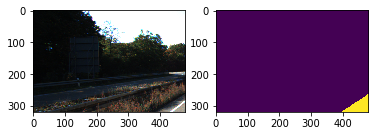

In [5]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("all_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [6]:
sess = tf.Session()
logger = Logger(sess,config)
trainer = RoadTrainer(sess,model,data,config,logger)
trainer.train()

Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:52<00:00,  5.39s/it]


-->Last epoch loss     :  0.90664285
-->Last epoch accuracy :  0.22971842
-->Last test loss     :  0.52680606
-->Last test accuracy :  0.33719796
Saving model...
Model saved
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:54<00:00,  5.23s/it]


-->Last epoch loss     :  0.2825786
-->Last epoch accuracy :  0.47762546
-->Last test loss     :  0.16657758
-->Last test accuracy :  0.67503756
Saving model...
Model saved


In [7]:
test = [data.get_data_element("all_data",i) for i in range(5)]
for item in test :
    img = item[0]
    mask = item[1]
    model.predict(sess,img,mask)

AttributeError: 'Fcn8sModel' object has no attribute 'predict'